In [3]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from skimage.transform import resize

In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [14]:
import os  # Import the os module

# Define paths
input_directory = r"C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\glioma"
output_directory = r"C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\glioma"

# Ensure the output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load images from the directory
def load_images_from_directory(directory):
    images = []
    filenames = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust extensions as needed
            filepath = os.path.join(directory, filename)
            image = cv2.imread(filepath)  # Load image
            if image is not None:
                images.append(image)
                filenames.append(filename)
    return images, filenames

images, filenames = load_images_from_directory(input_directory)

Clahe

In [15]:
def apply_clahe(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Create CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    
    # Apply CLAHE
    enhanced_image = clahe.apply(gray_image)
    return enhanced_image
def save_images(images, filenames, output_directory):
    for img, filename in zip(images, filenames):
        output_path = os.path.join(output_directory, filename)
        cv2.imwrite(output_path, img)  # Save image
        print(f"Saved processed image: {output_path}")
# Process all images
processed_images = []
for image in images:
    processed_image = apply_clahe(image)  # Apply CLAHE
    processed_images.append(processed_image)

# Save processed images
save_images(processed_images, filenames, output_directory)        

Saved processed image: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\glioma\Tr-glTr_0000.jpg
Saved processed image: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\glioma\Tr-glTr_0001.jpg
Saved processed image: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\glioma\Tr-glTr_0002.jpg
Saved processed image: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\glioma\Tr-glTr_0003.jpg
Saved processed image: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\glioma\Tr-glTr_0004.jpg
Saved processed image: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\glioma\Tr-glTr_0005.jpg
Saved processed image: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\glioma\Tr-glTr_0006.jpg
Saved processed image: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\glioma\Tr-glTr_0007.jpg
Saved pr

Image Normalization


In [16]:
import os
import cv2
import numpy as np

# Directories
input_directory = r"C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData"
output_directory = r"C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting"

# Ensure output directory exists and create subfolders
try:
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    # Create subfolders based on input directory contents
    for subfolder in os.listdir(input_directory):
        subfolder_path = os.path.join(output_directory, subfolder)
        if not os.path.exists(subfolder_path):
            os.makedirs(subfolder_path)
            print(f"Created subfolder: {subfolder_path}")

except OSError as e:
    print(f"Error creating directories: {e}")


Created subfolder: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting\glioma
Created subfolder: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting\NormalizedTesting


In [17]:
# Function to normalize images
def normalize_image(image):
    return image / 255.0  # Normalize to range [0, 1]

# Iterate through each subfolder (class folder)
for class_folder in os.listdir(input_directory):
    class_input_path = os.path.join(input_directory, class_folder)
    class_output_path = os.path.join(output_directory, class_folder)

    if os.path.isdir(class_input_path):  # Ensure it's a directory
        for filename in os.listdir(class_input_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust for valid formats
                # Load image
                image_path = os.path.join(class_input_path, filename)
                image = cv2.imread(image_path)
                
                # Normalize image
                if image is not None:
                    normalized_image = normalize_image(image)
                    
                    # Save normalized image
                    output_path = os.path.join(class_output_path, filename.replace(".jpg", ".npy").replace(".png", ".npy"))
                    np.save(output_path, normalized_image)
                    print(f"Saved normalized image: {output_path}")

Saved normalized image: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting\glioma\Tr-glTr_0000.npy
Saved normalized image: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting\glioma\Tr-glTr_0001.npy
Saved normalized image: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting\glioma\Tr-glTr_0002.npy
Saved normalized image: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting\glioma\Tr-glTr_0003.npy
Saved normalized image: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting\glioma\Tr-glTr_0004.npy
Saved normalized image: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting\glioma\Tr-glTr_0005.npy
Saved normalized image: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting\glioma\Tr-glTr_0006.npy

Output Directory: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting
Existing directories: ['glioma', 'NormalizedTesting']
Root: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting
Subdirectories: ['glioma', 'NormalizedTesting']
Files: []
Root: C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting\glioma
Subdirectories: []
Files: ['Tr-glTr_0000.npy', 'Tr-glTr_0001.npy', 'Tr-glTr_0002.npy', 'Tr-glTr_0003.npy', 'Tr-glTr_0004.npy', 'Tr-glTr_0005.npy', 'Tr-glTr_0006.npy', 'Tr-glTr_0007.npy', 'Tr-glTr_0008.npy', 'Tr-glTr_0009.npy', 'Tr-gl_0010.npy', 'Tr-gl_0011.npy', 'Tr-gl_0012.npy', 'Tr-gl_0013.npy', 'Tr-gl_0014.npy', 'Tr-gl_0015.npy', 'Tr-gl_0016.npy', 'Tr-gl_0017.npy', 'Tr-gl_0018.npy', 'Tr-gl_0019.npy', 'Tr-gl_0020.npy', 'Tr-gl_0021.npy', 'Tr-gl_0022.npy', 'Tr-gl_0023.npy', 'Tr-gl_0024.npy', 'Tr-gl_0025.npy', 'Tr-gl_0026.npy', 'Tr-gl_0027.npy', 'Tr-gl_0028.npy

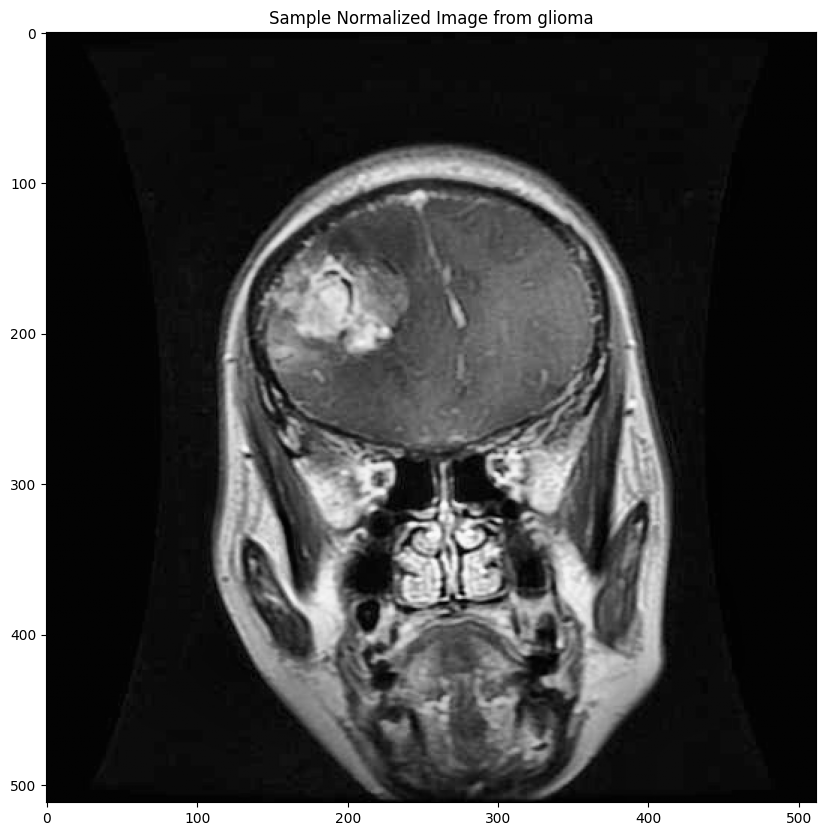

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Verify the directory structure
print("Output Directory:", output_directory)
print("Existing directories:", os.listdir(output_directory))

# List all subdirectories to check what's actually there
for root, dirs, files in os.walk(output_directory):
    print(f"Root: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")

# Modify the code to be more robust
try:
    # List available classes/subdirectories
    available_classes = os.listdir(output_directory)
    print("Available classes:", available_classes)

    # Choose the first available class if "Glioma" is not found
    sample_class = "Glioma" if "Glioma" in available_classes else available_classes[0]
    
    # Full path to the class directory
    class_directory = os.path.join(output_directory, sample_class)
    
    # List files in the class directory
    sample_files = os.listdir(class_directory)
    print(f"Files in {sample_class} directory:", sample_files)
    
    # Pick the first file
    sample_file = sample_files[0]
    
    # Full path to the sample image
    sample_image_path = os.path.join(class_directory, sample_file)
    
    # Load the normalized image
    sample_image = np.load(sample_image_path)
    
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(sample_image)
    plt.title(f"Sample Normalized Image from {sample_class}")
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

Balancing Dataset Using Gan

In [19]:
import os

# Define paths for training, validation, and C:\Users\output directories
folder_path = r"C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting\glioma"
input_dir = r"C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting\NormalizedTesting"
output_folder = r"C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\Output"

# Function to count files in a directory
def count_files_in_directory(directory):
    file_count = 0
    for root, dirs, files in os.walk(directory):
        file_count += len(files)
    return file_count

# Count files in training subfolders
print("Training Subfolder File Counts:")
try:
    for subfolder_name in os.listdir(input_dir):
        subfolder_path = os.path.join(input_dir, subfolder_name)
        if os.path.isdir(subfolder_path):
            subfolder_file_count = count_files_in_directory(subfolder_path)
            print(f"Total number of files in subfolder '{subfolder_name}' of training: {subfolder_file_count}")
except Exception as e:
    print(f"Error counting training files: {e}")

# Count files in validation subfolders
print("\nValidation Subfolder File Counts:")
try:
    for subfolder_name in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder_name)
        if os.path.isdir(subfolder_path):
            subfolder_file_count = count_files_in_directory(subfolder_path)
            print(f"Total number of files in subfolder '{subfolder_name}' of validation: {subfolder_file_count}")
except Exception as e:
    print(f"Error counting validation files: {e}")

# Count files in output folder subfolders
print("\nOutput Folder Subfolder File Counts:")
try:
    for folder_name in os.listdir(output_folder):
        folder_path = os.path.join(output_folder, folder_name)
        if os.path.isdir(folder_path):
            file_count = count_files_in_directory(folder_path)
            print(f"Total number of files in folder '{folder_name}': {file_count}")
except Exception as e:
    print(f"Error counting output folder files: {e}")

# Count total files in output folder
try:
    total_file_count = count_files_in_directory(output_folder)
    print(f"\nTotal number of files in the output folder: {total_file_count}")
except Exception as e:
    print(f"Error counting total files in output folder: {e}")

Training Subfolder File Counts:

Validation Subfolder File Counts:

Output Folder Subfolder File Counts:
Total number of files in folder 'validation': 0

Total number of files in the output folder: 0


In [22]:
#### AUGUMENTATION

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Paths
base_dir = "output\validation"  # Directory containing subfolders
output_dir = "TestingData"         # Directory for saving augmented images

# Target counts for each folder
TARGET_COUNTS = {
    "glioma": 319,        # No augmentation needed
    "meningioma": 319,     # Augment to reach 574 images
    "pituitary": 319,
    "notumor": 319     # Augment to reach 1140 images
}

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Image augmentation setup
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Function to augment images to the target count
def augment_images_to_target(input_dir, output_dir, target_count):
    class_name = os.path.basename(input_dir)
    output_class_dir = os.path.join(output_dir, class_name)

    # Ensure output subfolder exists
    if not os.path.exists(output_class_dir):
        os.makedirs(output_class_dir)

    # Copy existing images to the output directory
    current_images = [img for img in os.listdir(input_dir) if img.endswith((".png", ".jpg", ".jpeg"))]
    for img_name in current_images:
        src_path = os.path.join(input_dir, img_name)
        dest_path = os.path.join(output_class_dir, img_name)
        if not os.path.exists(dest_path):  # Avoid overwriting
            os.system(f'cp "{src_path}" "{dest_path}"')

    # Update the count of existing images
    current_count = len(os.listdir(output_class_dir))
    deficit = target_count - current_count

    if deficit <= 0:
        print(f"No augmentation needed for {class_name}. Current count: {current_count}")
        return

    print(f"Augmenting {class_name} with {deficit} images...")

    # Augment images
    augmented_count = 0
    while augmented_count < deficit:
        for img_name in current_images:
            if augmented_count >= deficit:
                break

            img_path = os.path.join(input_dir, img_name)
            img = load_img(img_path)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_class_dir,
                                      save_prefix="aug", save_format="png"):
                augmented_count += 1
                if augmented_count >= deficit:
                    break

    print(f"Augmentation for {class_name} complete. Total images: {len(os.listdir(output_class_dir))}")

# Main process
# Augment each class folder based on the target counts
for folder_name, target_count in TARGET_COUNTS.items():
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.exists(folder_path):
        augment_images_to_target(folder_path, output_dir, target_count)
    else:
        print(f"Folder not found: {folder_name}")

print("Data augmentation process complete!")

Folder not found: glioma
Folder not found: meningioma
Folder not found: pituitary
Folder not found: notumor
Data augmentation process complete!


Data Splitting


In [26]:
import os
import random
import shutil

def split_dataset(data_dir, output_dir, split_ratio=0.8):
    # Create output directories
    train_dir = os.path.join(output_dir, "output", "Training")
    val_dir = os.path.join(output_dir, "output", "validation")
    
    # Ensure directories exist
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    
    # Iterate over each class
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        
        # Verify it's a directory
        if not os.path.isdir(class_path):
            continue
        
        # Get all files in the class directory
        try:
            files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        except PermissionError:
            print(f"Permission denied for directory: {class_path}")
            continue
        
        # Shuffle files
        random.shuffle(files)
        
        # Calculate split index
        split_idx = int(len(files) * split_ratio)
        
        # Create class-specific train/val directories
        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)
        
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)
        
        # Copy files with error handling
        for i, file in enumerate(files):
            src_path = os.path.join(class_path, file)
            
            try:
                # Determine destination based on split
                if i < split_idx:
                    dst_path = os.path.join(train_class_dir, file)
                else:
                    dst_path = os.path.join(val_class_dir, file)
                
                # Use copy2 to preserve metadata
                shutil.copy2(src_path, dst_path)
            
            except PermissionError:
                print(f"Permission denied for file: {src_path}")
            except FileNotFoundError:
                print(f"File not found: {src_path}")
            except Exception as e:
                print(f"Error copying {src_path}: {e}")
        
        print(f"Class '{class_name}': {split_idx} training files, {len(files) - split_idx} validation files")

# Directories
data_directory = r"C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TestingData"
output_directory = r"C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting"

# Run the function
split_dataset(data_directory, output_directory, split_ratio=0.8)


Class 'glioma': 240 training files, 60 validation files
Class 'meningioma': 244 training files, 62 validation files
Class 'notumor': 324 training files, 81 validation files
Class 'pituitary': 240 training files, 60 validation files


In [27]:
import cv2
import os

# Directory containing the images
image_dir = r"C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting\output\Training\glioma"

# Iterate through each image file
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)
        
        # Check the shape of the image
        if image is not None:
            print(f"Image: {filename}, Shape: {image.shape}")
        else:
            print(f"Failed to load image: {filename}")


Image: Te-glTr_0000.jpg, Shape: (512, 512, 3)
Image: Te-glTr_0001.jpg, Shape: (512, 512, 3)
Image: Te-glTr_0003.jpg, Shape: (512, 512, 3)
Image: Te-glTr_0004.jpg, Shape: (512, 512, 3)
Image: Te-glTr_0005.jpg, Shape: (512, 512, 3)
Image: Te-glTr_0006.jpg, Shape: (512, 512, 3)
Image: Te-glTr_0008.jpg, Shape: (512, 512, 3)
Image: Te-glTr_0009.jpg, Shape: (512, 512, 3)
Image: Te-gl_0011.jpg, Shape: (512, 512, 3)
Image: Te-gl_0012.jpg, Shape: (512, 512, 3)
Image: Te-gl_0014.jpg, Shape: (512, 512, 3)
Image: Te-gl_0015.jpg, Shape: (512, 512, 3)
Image: Te-gl_0017.jpg, Shape: (512, 512, 3)
Image: Te-gl_0018.jpg, Shape: (512, 512, 3)
Image: Te-gl_0019.jpg, Shape: (512, 512, 3)
Image: Te-gl_0021.jpg, Shape: (512, 512, 3)
Image: Te-gl_0022.jpg, Shape: (512, 512, 3)
Image: Te-gl_0023.jpg, Shape: (512, 512, 3)
Image: Te-gl_0025.jpg, Shape: (512, 512, 3)
Image: Te-gl_0028.jpg, Shape: (512, 512, 3)
Image: Te-gl_0029.jpg, Shape: (512, 512, 3)
Image: Te-gl_0030.jpg, Shape: (512, 512, 3)
Image: Te-gl_003

Feature extraction


Found 1048 images belonging to 4 classes.
Found 263 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Extracting features using VGG19...
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 

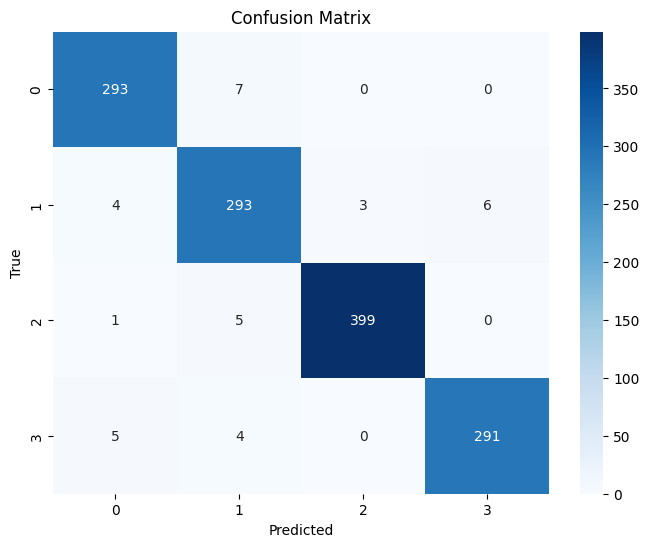

Test Accuracy: 0.9733


In [28]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt

class BrainTumorClassifier:
    def __init__(self, train_dir, val_dir, test_dir, img_size=(224, 224), batch_size=32):
        self.train_dir = train_dir
        self.val_dir = val_dir
        self.test_dir = test_dir
        self.img_size = img_size
        self.batch_size = batch_size
        self.train_generator = None
        self.val_generator = None
        self.test_generator = None
        self.feature_extractor = None

    def create_data_generators(self):
        train_datagen = ImageDataGenerator(rescale=1./255)
        val_test_datagen = ImageDataGenerator(rescale=1./255)

        self.train_generator = train_datagen.flow_from_directory(
            self.train_dir,
            target_size=self.img_size,
            batch_size=self.batch_size,
            class_mode='categorical'
        )

        self.val_generator = val_test_datagen.flow_from_directory(
            self.val_dir,
            target_size=self.img_size,
            batch_size=self.batch_size,
            class_mode='categorical'
        )

        self.test_generator = val_test_datagen.flow_from_directory(
            self.test_dir,
            target_size=self.img_size,
            batch_size=self.batch_size,
            class_mode='categorical',
            shuffle=False
        )

    def extract_features(self, data_generator):
        print("Extracting features using VGG19...")
        base_model = VGG19(weights='imagenet', include_top=False, input_shape=(*self.img_size, 3))
        self.feature_extractor = Model(inputs=base_model.input, outputs=Flatten()(base_model.output))

        features, labels = [], []
        for i, (x_batch, y_batch) in enumerate(data_generator):
            feature_batch = self.feature_extractor.predict(x_batch)
            features.append(feature_batch)
            labels.append(y_batch)

            if i >= len(data_generator) - 1:
                break

        return np.vstack(features), np.vstack(labels)

    def perform_feature_selection_rfecv(self, X_train, y_train, X_val=None, X_test=None):
        print("Performing feature selection using RFECV...")
        y_train = np.argmax(y_train, axis=1)  # Convert one-hot labels to integers

        # Fit RFECV on training data
        estimator = SVC(kernel="linear")
        selector = RFECV(estimator, step=0.1, cv=5, scoring='accuracy', verbose=1)
        selector.fit(X_train, y_train)

        # Transform datasets to keep selected features
        X_train_selected = selector.transform(X_train)
        X_val_selected = selector.transform(X_val) if X_val is not None else None
        X_test_selected = selector.transform(X_test) if X_test is not None else None

        print(f"Original training features: {X_train.shape}")
        print(f"Reduced training features: {X_train_selected.shape}")
        
        return X_train_selected, X_val_selected, X_test_selected

    def build_and_train_svm(self, X_train, y_train, X_val, y_val):
        print("Training SVM classifier...")
        y_train = np.argmax(y_train, axis=1)  # Convert one-hot labels to integers
        y_val = np.argmax(y_val, axis=1)

        svm = SVC(kernel='linear', probability=True)
        svm.fit(X_train, y_train)

        val_accuracy = svm.score(X_val, y_val)
        print(f"Validation Accuracy: {val_accuracy:.4f}")

        return svm

    def evaluate(self, model, X_test, y_test):
        print("Evaluating the model...")
        y_test = np.argmax(y_test, axis=1)  # Convert one-hot labels to integers
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        return accuracy

def main():
    # Specify the paths to your directories
    train_dir = r"C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting\output\Training"
    val_dir = r"C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TrainingData\NormalizedTesting\output\validation"
    test_dir = r"C:\Users\mdraz\OneDrive\Desktop\Brain Tumor Project\archive (2)\TestingData"

    classifier = BrainTumorClassifier(train_dir, val_dir, test_dir)

    # Step 1: Data Preparation
    classifier.create_data_generators()

    # Step 2: Feature Extraction
    X_train, y_train = classifier.extract_features(classifier.train_generator)
    X_val, y_val = classifier.extract_features(classifier.val_generator)
    X_test, y_test = classifier.extract_features(classifier.test_generator)

    # Step 3: Feature Selection using RFECV
    X_train_selected, X_val_selected, X_test_selected = classifier.perform_feature_selection_rfecv(
        X_train, y_train, X_val, X_test
    )

    # Step 4: Train SVM Classifier
    svm_model = classifier.build_and_train_svm(X_train_selected, y_train, X_val_selected, y_val)

    # Step 5: Evaluate Model
    test_accuracy = classifier.evaluate(svm_model, X_test_selected, y_test)
    print(f"Test Accuracy: {test_accuracy:.4f}")

if __name__ == "__main__":
    main()
